# Country Comparison
This project will compare countires using Python and data from <a href=https://www.cia.gov/the-world-factbook/> the CIA's World Facebook </a> on each country's life expectancy at birth and number of internet users.

![World Map](https://www.cia.gov/the-world-factbook/static/94795a76638f6385b051647ac2ac1c4b/world_pol.jpg)

In [3]:
# Importing modules that will be used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Adding Data

In [4]:
# Reading in data from local csv using pandas read_csv function
comparison_df = pd.read_csv('County_Comparison.csv')

# displaying the top 5 rows of the newly created comparsion_df DataFrame to ensure it was loaded correctly
comparison_df.head()

,NAME,SLUG,LIFE-EXPECTANCY-AT-BIRTH,DATE-OF-INFORMATION,REAL-GDP-PER-CAPITA,MEDIAN-AGE,REGION
0,Afghanistan,afghanistan,53.65,NaN,"$2,000",19.5,South Asia
1,Albania,albania,79.47,NaN,"$13,300",34.3,Europe
2,Algeria,algeria,78.03,NaN,"$10,700",28.9,Africa
3,American Samoa,american-samoa,75.32,NaN,"$11,200",27.2,Australia and Oceania
4,Andorra,andorra,83.42,NaN,"$49,900",46.2,Europe


## Manipulating and Cleaning Data

In [5]:
# using the drop function to get rid columns that will not be used for this project
clean_comparison_df = comparison_df.drop(columns=['SLUG', 'DATE-OF-INFORMATION'])

# displaying the top 5 rows of the cleaned DataFrame to emsure the unnecessary columns were dropped correctly
clean_comparison_df.head()

,NAME,LIFE-EXPECTANCY-AT-BIRTH,REAL-GDP-PER-CAPITA,MEDIAN-AGE,REGION
0,Afghanistan,53.65,"$2,000",19.5,South Asia
1,Albania,79.47,"$13,300",34.3,Europe
2,Algeria,78.03,"$10,700",28.9,Africa
3,American Samoa,75.32,"$11,200",27.2,Australia and Oceania
4,Andorra,83.42,"$49,900",46.2,Europe


In [6]:
# Removing the comma and dollar sign from the Real-GDP-Per-Capita column so the values in that column can be used later on in the project
clean_comparison_df['REAL-GDP-PER-CAPITA'] = clean_comparison_df['REAL-GDP-PER-CAPITA'].astype(str)
clean_comparison_df['REAL-GDP-PER-CAPITA'] = clean_comparison_df['REAL-GDP-PER-CAPITA'].replace('\$','', regex=True)
clean_comparison_df['REAL-GDP-PER-CAPITA'] = clean_comparison_df['REAL-GDP-PER-CAPITA'].replace(',','', regex=True)
clean_comparison_df['REAL-GDP-PER-CAPITA'] = clean_comparison_df['REAL-GDP-PER-CAPITA'].astype(float)

## Analyzing Data

First, I will find out how many countires we are comparing by using the shape() function. 

In [7]:
# Finding total number of countires
num_rows = clean_comparison_df.shape[0]

print(f"There are {num_rows} rows in the DataFrame, so there should be {num_rows} countires in the comparsion data.")


There are 226 rows in the DataFrame, so there should be 226 countires in the comparsion data.


To double check my above assumption, I will use the nunique() function to count the number of unique values in the Country Name column. 

This number should match the number of rows in the DataFrame and will confirm that no duplicate countries exist in the data. I will use conditional statements to be sure the numbers match.

In [8]:
# Finding number of unique Country Names in Names column
num_countries = clean_comparison_df['NAME'].nunique()
print(f"There are {num_countries} unique country names in the data.\n")

# Checking to be sure the number of rows matches the number of countires
if num_rows == num_countries:
    print('The number of rows matches the number of unique country names. There are no duplicate values.')
elif num_rows > num_countries:
    print('There are more rows than unqiue country names. There are duplicate countires in the data.')
else:
    print("There are more unique country names than rows. Something is wrong.")


There are 226 unique country names in the data.

The number of rows matches the number of unique country names. There are no duplicate values.


### Life Expectancy Analysis

Now that we know how many countries we are comparing, I will rank each country from highest life expectancy to lowest life expectancy. I will also rank each countries real GDP per capita and save both of these as new columns. I will then sort the DataFrame from best life expectancy rank to lowest life expectancy rank.

In [9]:
# Ranking each country from greatest life expectancy to least life expectancy and creating a column to store the ranking
ranked_comparison_df = clean_comparison_df.copy()
ranked_comparison_df['Life_Expectancy_Rank'] = ranked_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].rank(ascending=False)

# Now ranking each country from highest GDP per capita to lowest GDP per capita and creating a column for that ranking
double_ranked_comparsion_df = ranked_comparison_df.copy()
double_ranked_comparsion_df['GDP_Rank'] = double_ranked_comparsion_df['REAL-GDP-PER-CAPITA'].rank(ascending=False)

# sorting dataframe by life expectancy rank in descending order
sorted_comparison_df = double_ranked_comparsion_df.sort_values(by='Life_Expectancy_Rank')
sorted_comparison_df.head()

,NAME,LIFE-EXPECTANCY-AT-BIRTH,REAL-GDP-PER-CAPITA,MEDIAN-AGE,REGION,Life_Expectancy_Rank,GDP_Rank
135,Monaco,89.52,115700.0,55.4,Europe,1.0,2.0
183,Singapore,86.35,93400.0,35.6,East and Southeast Asia,2.0,4.0
122,Macau,84.98,54800.0,40.8,East and Southeast Asia,3.0,20.0
102,Japan,84.83,41400.0,48.6,East and Southeast Asia,4.0,40.0
176,San Marino,83.86,60800.0,45.2,Europe,5.0,15.0


Now that I have ranked every country and sorted the data, I will use the min(), median(), and max() functions with the loc() function to identify the countries with the highest an lowest life expectancies as well as the overall median life expectancy.

In [10]:
#Finding the min, median, and max of life expectancies and saving those values as variables
median_expectancy = str(sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].median())
min_lf = (sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].min())
min_lf_country = sorted_comparison_df.loc[sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH']== min_lf, 'NAME'].iloc[0]
max_lf = sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH'].max()
max_lf_country = sorted_comparison_df.loc[sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH']== max_lf, 'NAME'].iloc[0]

# printing statements showing the min, median and max life expectancies in context
print ("The median life expectancy for all countries is " + median_expectancy + " years. \n")
print(f"The country with the lowest life expectancy at birth is {min_lf_country} with a life expectancy of {min_lf} years.\n")
print(f"The country with the higest life expectancy at birth is {max_lf_country} with a life expectancy of {max_lf} years.")

The median life expectancy for all countries is 75.8 years. 

The country with the lowest life expectancy at birth is Afghanistan with a life expectancy of 53.65 years.

The country with the higest life expectancy at birth is Monaco with a life expectancy of 89.52 years.


Now I will use the groupby() function to identify the median life expectancy by region, rather than by individual country.

In [11]:
print ('Here are the median life expectancies of all countires in each region:')
sorted_comparison_df.groupby('REGION').agg({'LIFE-EXPECTANCY-AT-BIRTH': ['median']})


Here are the median life expectancies of all countires in each region:


,LIFE-EXPECTANCY-AT-BIRTH
,median
REGION,
Africa,65.850
Australia and Oceania,75.950
Central America and the Caribbean,77.905
Central Asia,72.395
East and Southeast Asia,75.825
Europe,81.510
Middle East,76.515
North America,81.000


### Median Age Analysis

Next I will once again use the min(), median(), and max() functions with the loc() function to identify the countries with the highest an lowest median age. 

I will compare the results of the median age analysis with the life expectancy analaysis. 

In [12]:
#Finding the min, median, and max of median ages and saving those values as variables
min_age = sorted_comparison_df['MEDIAN-AGE'].min()
min_age_country = str(sorted_comparison_df.loc[sorted_comparison_df['MEDIAN-AGE']==min_age, 'NAME'].iloc[0])
max_age = sorted_comparison_df['MEDIAN-AGE'].max()
max_age_country = str(sorted_comparison_df.loc[sorted_comparison_df['MEDIAN-AGE']==max_age, 'NAME'].iloc[0])

print(f"The country with the lowest median age is {min_age_country} with a median age of {min_age} years, and the country with the highest median age is {max_age_country} with a median age of {max_age} years. \n\nAs Monaco has the highest life expectancy, it makes sense that their population skews older and has the highest median age. \n" )

# Finding Niger's life expectancy and ranking to compare its average age
Niger_lf = sorted_comparison_df.loc[sorted_comparison_df['NAME']=='Niger', 'LIFE-EXPECTANCY-AT-BIRTH'].iloc[0]
Niger_lf_rank = int(sorted_comparison_df.loc[sorted_comparison_df['NAME']=='Niger', 'Life_Expectancy_Rank'].iloc[0])

print(f"Niger's life expectancy is {Niger_lf} and it ranks {Niger_lf_rank} out of {num_countries}. As Niger's life expectancy is on the lower end of the range it makes sense that thier population skews younger.")


The country with the lowest median age is Niger with a median age of 14.8 years, and the country with the highest median age is Monaco with a median age of 55.4 years. 

As Monaco has the highest life expectancy, it makes sense that their population skews older and has the highest median age. 

Niger's life expectancy is 60.09 and it ranks 217 out of 226. As Niger's life expectancy is on the lower end of the range it makes sense that thier population skews younger.


## Visualizing Data

In [13]:
#set variables 
expectancy=sorted_comparison_df['LIFE-EXPECTANCY-AT-BIRTH']
expectancy=np.round(expectancy,0)
expectancy=expectancy.astype(int)

In [14]:
comparsion_by_region = sorted_comparison_df.groupby(['REGION'], as_index=False).median()

# Creating helper objects
regional_le = np.array(comparsion_by_region['LIFE-EXPECTANCY-AT-BIRTH'])
regional_regions = np.array(comparsion_by_region['REGION'])

# rounding the variable and saving it as an int
regional_le = np.round(regional_le,0)
regional_le = regional_le.astype(int)


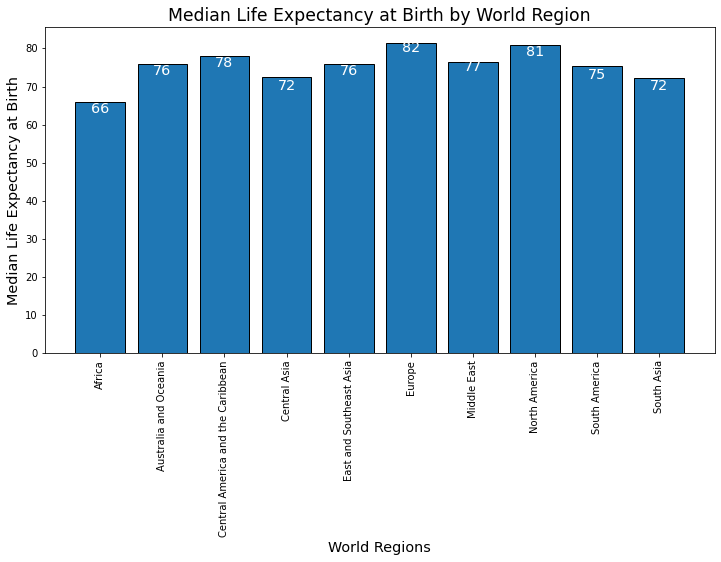

In [15]:
# Creating bar chart showing the life expectancies by region
plt.figure(figsize=(12,6))
plt.bar(comparsion_by_region['REGION'], comparsion_by_region['LIFE-EXPECTANCY-AT-BIRTH'], edgecolor='black')
plt.title("Median Life Expectancy at Birth by World Region", fontsize='xx-large')
plt.xlabel('World Regions', fontsize='x-large')
plt.ylabel('Median Life Expectancy at Birth', fontsize='x-large')
plt.xticks(rotation='vertical')

for i in range(len(regional_le)):
        plt.annotate(text = (str(regional_le[i])), xy = (regional_regions[i], regional_le[i]),
            fontsize= 'x-large', horizontalalignment='center', verticalalignment='top', color='white')

plt.show()

Now I will see if there is a relationship between how a country ranks for life expectancy at birth and how it ranks for real GDP per capita. 

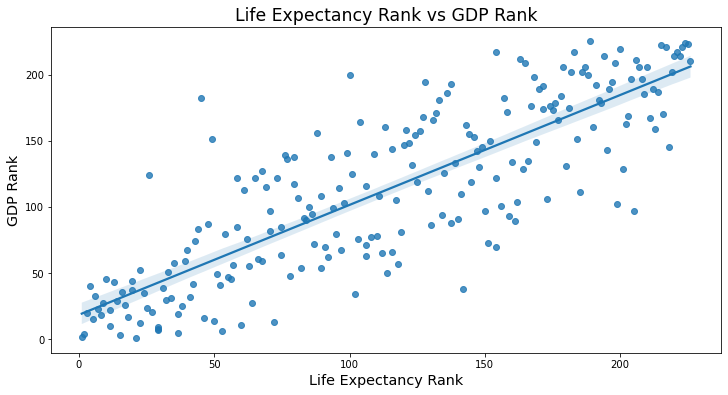

In [43]:
# Creating scatterplot with line of best fit with seaborn
plt.figure(figsize=(12,6))
sns.regplot(data=sorted_comparison_df, x='Life_Expectancy_Rank', y='GDP_Rank')
plt.title("Life Expectancy Rank vs GDP Rank", fontsize='xx-large')
plt.xlabel('Life Expectancy Rank', fontsize='x-large')
plt.ylabel('GDP Rank', fontsize='x-large')

plt.show()

As the line of best fit on the above graph shows, there is a relationship between a country's life expectancy at birth and real GDP per capita. 